# Gustavo Hernández Angeles
## Procesamiento de Lenguaje Natural
### Práctica 3: Bolsas de Términos y esquemas de pesado

In [197]:
import os
import re
from keras.preprocessing.text import Tokenizer

In [198]:
def get_texts_from_file(path_corpus, path_truth):
    tr_txt = []
    tr_y = []

    # Manera más chida de abrir (y cerrar auto) archivos.
    with open(path_corpus, "r", encoding="utf-8-sig") as f_corpus, open(path_truth, "r", encoding="utf-8-sig") as f_truth:
        for twitt in f_corpus:
            tr_txt += [twitt]
        for label in f_truth:
            tr_y += [label]

    return tr_txt, tr_y

In [199]:
tr_txt, tr_y = get_texts_from_file(".\\data\\mex_train.txt", ".\\data\\mex_train_labels.txt")

#### Estadísticas simples

In [200]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

Counter({0: 3759, 1: 1519})


Text(0.5, 0, 'Class')

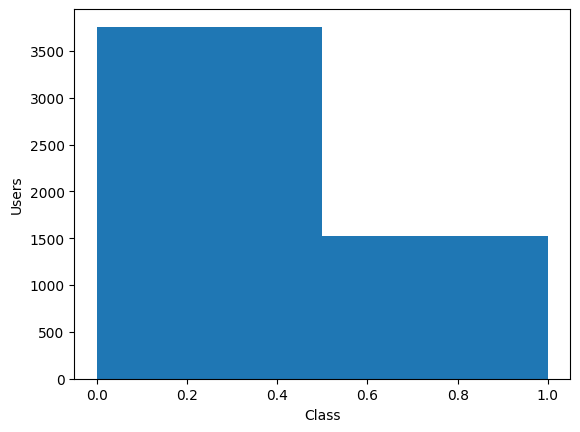

In [201]:
tr_y = list(map(int, tr_y))
print(Counter(tr_y))
plt.hist(tr_y, bins=len(set(tr_y)))

plt.ylabel("Users")
plt.xlabel("Class")

#### Un ojo a los datos

In [202]:
tr_txt[:10]

['@USUARIO @USUARIO @USUARIO Q se puede esperar del maricon de closet de la Yañez aun recuerdo esa ves q lo vi en zona rosa viendo quien lo levantada\n',
 '@USUARIO La piel nueva siempre arde un poquito los primeros días... y más con este puto clima\n',
 'Ustedes no se enamoran de mí… por tontas.\n',
 'Me las va a pagar esa puta gorda roba tuits...\n',
 '@USUARIO LA GENTE ES TONTA PORQUE NO SE DAN CUENTA QUE TÚ HACES A BATMAN AZUL\n',
 'Estoy muy encabronada con las pseudo feministas por tontas e iletradas, a veces me avergüenza ser mujer; preferiría tener un falo. #NiUnaMas\n',
 'Anden putos, recuerdan el #noerapenal #Holanda fuera de #Rusia2018, esto se llama #karma ehhhhhhhh #puuuuuutos\n',
 'Si no tienen chichis no traten de enseñar se ven muy mal y más cuando son prietas.\n',
 'Ojalá asi me agarrars cuando te digo que me voy en lugar de correrme a la verga cada 5 minutos.\n',
 '@USUARIO @USUARIO @USUARIO @USUARIO Es solo un HDP aprovechado y que su "Diosito Bimbo" me perdone\n']

In [203]:
from nltk.tokenize import TweetTokenizer
import nltk
tokenizer = TweetTokenizer()

In [204]:
corpus_palabras = []
for doc in tr_txt:
    corpus_palabras += tokenizer.tokenize(doc)

fdist = nltk.FreqDist(corpus_palabras)

In [205]:
fdist

FreqDist({',': 3016, 'de': 2915, 'que': 2829, '.': 2604, 'la': 2031, 'a': 1956, 'y': 1856, '!': 1435, 'no': 1430, '@USUARIO': 1399, ...})

In [206]:
len(fdist)

15194

In [207]:
def sortFreqDict(freqdict):
    aux = [(freqdict[key],key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [208]:
V = sortFreqDict(fdist)

In [209]:
V = V[:5000]

In [210]:
V

[(3016, ','),
 (2915, 'de'),
 (2829, 'que'),
 (2604, '.'),
 (2031, 'la'),
 (1956, 'a'),
 (1856, 'y'),
 (1435, '!'),
 (1430, 'no'),
 (1399, '@USUARIO'),
 (1198, 'me'),
 (1043, 'el'),
 (1018, 'en'),
 (851, 'se'),
 (736, 'es'),
 (706, 'con'),
 (704, '?'),
 (691, 'verga'),
 (683, 'los'),
 (665, 'madre'),
 (612, 'por'),
 (601, 'las'),
 (590, '"'),
 (582, 'un'),
 (550, 'te'),
 (547, 'mi'),
 (509, 'lo'),
 (493, 'putas'),
 (472, 'una'),
 (464, '...'),
 (462, 'putos'),
 (458, 'para'),
 (434, '😂'),
 (422, 'si'),
 (420, 'ya'),
 (416, 'como'),
 (403, 'su'),
 (377, 'pero'),
 (365, 'tu'),
 (357, 'loca'),
 (350, 'le'),
 (325, 'más'),
 (318, 'No'),
 (298, 'del'),
 (294, 'gorda'),
 (284, 'al'),
 (252, 'bien'),
 (249, 'A'),
 (243, '¿'),
 (242, 'Y'),
 (229, 'son'),
 (229, 'Me'),
 (227, 'o'),
 (225, 'feas'),
 (225, 'cuando'),
 (214, 'Que'),
 (208, ':'),
 (205, 'yo'),
 (199, 'les'),
 (196, 'porque'),
 (191, 'ni'),
 (191, 'está'),
 (189, 'ser'),
 (184, 'estoy'),
 (181, 'sus'),
 (172, 'todos'),
 (169, 'esta'

In [211]:
dict_indices = dict()
cont = 0
for weight, word in V:
    dict_indices[word] = cont
    cont += 1

#### Bolsa de Términos

In [212]:
import numpy as np

In [213]:
np.__version__

'1.26.4'

In [214]:
# Definimos una BOW con esquema de peso binario.
def build_bow_tr(tr_txt, V, dict_indices):
    # Construimos en 0
    BOW = np.zeros(shape=(len(tr_txt), len(V)), dtype=int)
    
    
    cont_doc = 0
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tokenizer.tokenize(tr))
        
        for word in fdist_doc:
            if word not in dict_indices:
                continue
            BOW[cont_doc, dict_indices[word]] = 1
            
        cont_doc += 1
    return BOW

In [215]:
BOW_tr = build_bow_tr(tr_txt, V, dict_indices)

In [216]:
BOW_tr.shape

(5278, 5000)

Counter({0: 418, 1: 169})


Text(0.5, 0, 'Class')

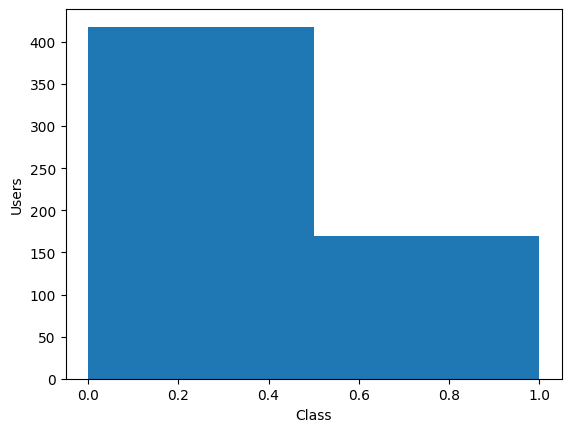

In [217]:
val_txt, val_y = get_texts_from_file(".\\data\\mex_val.txt", ".\\data\\mex_val_labels.txt")

val_y = list(map(int, val_y))

from collections import Counter
import matplotlib.pyplot as plt

print(Counter(val_y))
plt.hist(val_y, bins = len(set(val_y)))
plt.ylabel("Users")
plt.xlabel("Class")


### Clasificación

In [218]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support

# Parámetro de complejidad del SVM, se proponen estos
# y se recorrerán con GridSearch
parameters = {"C": [.05, .12, .25, .5, 1, 2, 4]}

# Tratar de penalizar con base a la proporción de ejemplos
# en cada clase
svr = svm.LinearSVC(class_weight='balanced')

grid = GridSearchCV(estimator=svr, param_grid=parameters,
                    n_jobs=6, scoring="f1_macro", cv=5)

grid.fit(BOW_tr, tr_y)

GridSearchCV(cv=5, estimator=LinearSVC(class_weight='balanced'), n_jobs=6,
             param_grid={'C': [0.05, 0.12, 0.25, 0.5, 1, 2, 4]},
             scoring='f1_macro')

In [219]:
BOW_val = build_bow_tr(val_txt, V, dict_indices)

In [220]:
y_pred = grid.predict(BOW_val)

# Varias medidas al mismo tiempo.
# El macro es el promedio de ambas bruto.
p, r, f, _ = precision_recall_fscore_support(val_y, y_pred, average="macro", pos_label=1)

print(confusion_matrix(val_y, y_pred))
print(metrics.classification_report(val_y, y_pred))

[[356  62]
 [ 49 120]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       418
           1       0.66      0.71      0.68       169

    accuracy                           0.81       587
   macro avg       0.77      0.78      0.77       587
weighted avg       0.82      0.81      0.81       587



In [221]:
incorrect = []

for e in zip(val_y, y_pred,range(len(val_y))):
    if e[0] != e[1]:
        incorrect += [e[2]]

In [222]:
for e in incorrect:
    case = e
    if "madre" in val_txt[case].strip():
        print("Texto: ", val_txt[case].strip())
        print("Truth: ", val_y[case])
        print("Pred: ", y_pred[case])

Texto:  Al perro que se te acerque le parto su madre a si de facil
Truth:  1
Pred:  0
Texto:  @USUARIO Ya m tienen hasta la madre esos maes
Truth:  0
Pred:  1
Texto:  Amigos, Vero tiene toda la razón por eso no hay que ir a esa madre, mejor todos a Costeño a empedar.
Truth:  0
Pred:  1
Texto:  Pero un día te voy a tapar el culo mientras te estoy lamiendo la pantunfla a ver si te da una embolia, hija de tu puta madre
Truth:  1
Pred:  0
Texto:  @USUARIO PA tener 80 estas a toda madre!
Truth:  0
Pred:  1
Texto:  Por está madre me agarré a vergazos con el de la combi y no le pagué, el puto decía que ya no valen.
Truth:  1
Pred:  0
Texto:  Ya van a ser las putas 8 y la pasarela no tiene para cuando empezar perra madre
Truth:  0
Pred:  1
Texto:  Políticos pseudoaficiomados que sólo en finales hablan de beisbol pueden ir mucho a chingar a su madre. Y peor cuando opinan.
Truth:  1
Pred:  0
Texto:  @USUARIO @USUARIO Hija de tu madre 😂😂😂😂🖕🏼🖕🏼🤚🏻
Truth:  0
Pred:  1
Texto:  La anciana madre de Fred

In [223]:
# BoW's binarias
BOW_tr
BOW_val

# Podemos obtener nuevas bolsas de palabras cuyo
# esquema de pesado sea tf-idf.

# Para idf
df_t = BOW_tr.sum(axis=0)
df_val = BOW_val.sum(axis=0)

n_t = BOW_tr.shape[0]
n_val = BOW_val.shape[0]

idf_t = np.log10(n_t / (1+df_t))
idf_val = np.log10(n_val /(1+df_val))

# Para tf
totalterms_t = BOW_tr.sum(axis=1)
totalterms_val = BOW_val.sum(axis=1)

print(idf_t.shape)
print(totalterms_t.shape)


(5000,)
(5278,)


In [224]:
# Definimos una BOW con esquema de peso de frecuencia.
def build_bow_f(tr_txt, V, dict_indices):
    # Construimos en 0
    BOW = np.zeros(shape=(len(tr_txt), len(V)), dtype=int)
    
    
    cont_doc = 0
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tokenizer.tokenize(tr))
        
        for word in fdist_doc:
            if word not in dict_indices:
                continue
            BOW[cont_doc, dict_indices[word]] += 1
            
        cont_doc += 1
    return BOW

In [225]:
BOWfreq_tr = build_bow_f(tr_txt, V, dict_indices)
BOWfreq_val = build_bow_f(val_txt, V, dict_indices) 

In [226]:
BOWtfidf_tr = np.zeros(shape=BOW_tr.shape)
BOWtfidf_val = np.zeros(shape=BOW_val.shape)
for i in range(len(totalterms_t)):
    if totalterms_t[i] == 0: totalterms_t[i] = 1
    BOWtfidf_tr[i,:] = BOWfreq_tr[i,:]/totalterms_t[i]

for i in range(len(totalterms_val)):
    if totalterms_val[i] == 0: totalterms_val[i] = 1
    BOWtfidf_val[i,:] = BOWfreq_val[i,:] / totalterms_val[i]

In [227]:
for i in range(BOWtfidf_tr.shape[0]):
    BOWtfidf_tr[i,:] = BOWtfidf_tr[i,:] / idf_t

for i in range(BOWtfidf_val.shape[0]):
    BOWtfidf_val[i,:] = BOWtfidf_val[i,:] / idf_t

In [228]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support

# Parámetro de complejidad del SVM, se proponen estos
# y se recorrerán con GridSearch
parameters = {"C": [.05, .12, .25, .5, 1, 2, 4]}

# Tratar de penalizar con base a la proporción de ejemplos
# en cada clase
svr = svm.LinearSVC(class_weight='balanced')

grid = GridSearchCV(estimator=svr, param_grid=parameters,
                    n_jobs=6, scoring="f1_macro", cv=5)

grid.fit(BOWtfidf_tr, tr_y)

GridSearchCV(cv=5, estimator=LinearSVC(class_weight='balanced'), n_jobs=6,
             param_grid={'C': [0.05, 0.12, 0.25, 0.5, 1, 2, 4]},
             scoring='f1_macro')

In [229]:
y_pred = grid.predict(BOW_val)

# Varias medidas al mismo tiempo.
# El macro es el promedio de ambas bruto.
p, r, f, _ = precision_recall_fscore_support(val_y, y_pred, average="macro", pos_label=1)

print(confusion_matrix(val_y, y_pred))
print(metrics.classification_report(val_y, y_pred))

[[323  95]
 [ 32 137]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       418
           1       0.59      0.81      0.68       169

    accuracy                           0.78       587
   macro avg       0.75      0.79      0.76       587
weighted avg       0.82      0.78      0.79       587



jajaja jquedó peor maldita sea